In [86]:
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [78]:
list_of_star_positions = []
for ii in range(600):
    list_of_star_positions.append((np.random.randint(0, 4088), np.random.randint(0, 4088)))

psf_size = 182
half_psf_size = int(psf_size / 2)

In [79]:
def bounds(position):
    x_lower = position[1] - half_psf_size
    x_upper = position[1] + half_psf_size
    y_lower = position[0] - half_psf_size
    y_upper = position[0] + half_psf_size
    bounds = (y_lower, y_upper, x_lower, x_upper)

    return bounds


def check_overlap(position1, position2):
    bounds1 = bounds(position1)
    bounds2 = bounds(position2)

    if ((
            bounds1[0] <= bounds2[0] <= bounds1[1] or
            bounds1[0] <= bounds2[1] <= bounds1[1]
         ) and
         (
            bounds1[2] <= bounds2[2] <= bounds1[3] or
            bounds1[2] <= bounds2[3] <= bounds1[3]
         )
    ):
        return True
    else:
        return False

G = nx.Graph()

for star in list_of_star_positions:
    G.add_node(star)

for star1 in list_of_star_positions:
    for star2 in list_of_star_positions:
        if star1 == star2:
            continue
        if check_overlap(star1, star2):
            G.add_edge(star1, star2)

In [91]:
coloring = nx.greedy_color(G)
unique_colors = set(coloring.values())
cmap = cm.get_cmap('tab20', len(unique_colors))

np.asarray(list(color_graph.values())).max()

/var/folders/r6/mx60w78n6_dfz54ll0pj9vf00000gn/T/ipykernel_27912/1674408355.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(unique_colors))


7

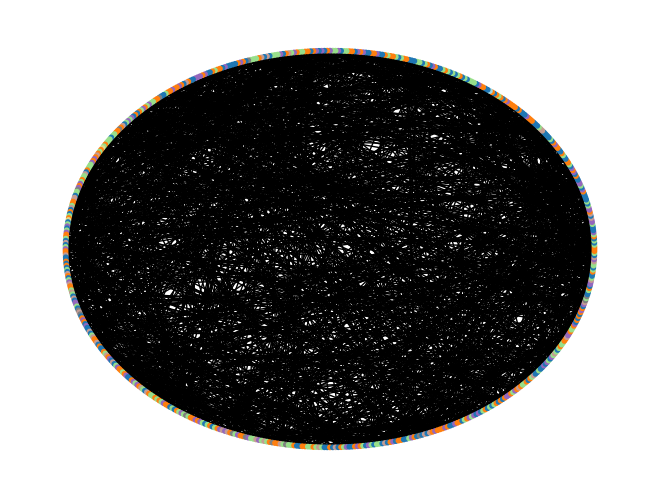

In [93]:
pos = nx.circular_layout(G)

nx.draw(G, pos,
        node_color=[cmap(coloring[node]) for node in G.nodes],
        node_size=10)